<a href="https://colab.research.google.com/github/cjsutton77/PracticeProblems/blob/main/screen_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PracticeProbs](https://d33wubrfki0l68.cloudfront.net/b6800cc830e3fd5a3a4c3d9cfb1137e6a4c15c77/ec467/assets/images/transparent-1.png)](https://www.practiceprobs.com/)

# [Screen Time](https://www.practiceprobs.com/problemsets/pytorch/tensors/screen-time/)

You suspect there's a linear relationship between how much daily screen time a person gets and how many hours they sleep. You acquire the data to investigate.

In [1]:
import numpy as np

rng = np.random.default_rng(123)
screentime = rng.uniform(low=4, high=12, size=500)
sleep = np.clip(-0.8*screentime + 10.5 + rng.normal(loc=0, scale=1.5, size=len(screentime)), 0, 24)

print(screentime[:5])  # [9.45881491 4.43056815 5.76287898 5.47497449 5.40724721]
print(sleep[:5])       # [2.87662678 6.24164643 6.14092628 4.54709214 5.24364   ]

[9.45881491 4.43056815 5.76287898 5.47497449 5.40724721]
[2.87662678 6.24164643 6.14092628 4.54709214 5.24364   ]


## Plot

Text(0, 0.5, 'sleep')

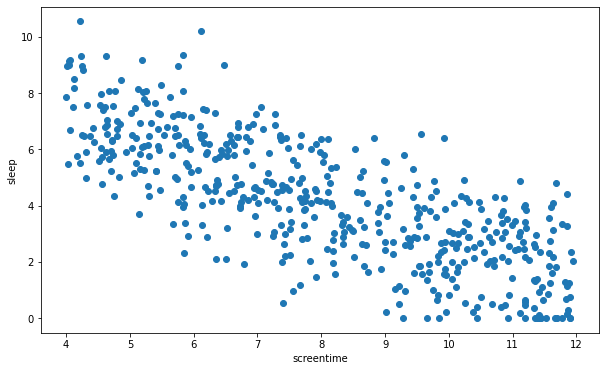

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(screentime, sleep)
ax.set_xlabel('screentime')
ax.set_ylabel('sleep')

Fit a simple linear regression model to this data using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) with the help of [`torch.autograd`](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

---

In [3]:
from torch import nn
import torch
import tqdm

In [4]:
loss = nn.MSELoss()

In [5]:
m = torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
m,b

(tensor([-0.0510], requires_grad=True), tensor([0.3351], requires_grad=True))

In [6]:
t_screen  = torch.from_numpy(screentime)
t_sleep = torch.from_numpy(sleep)

In [7]:
mr = []
mb = []
for i in tqdm.tqdm(range(100000)):
  pred = m * t_screen + b
  l = loss(pred,t_sleep)
  l.backward()
  with torch.no_grad():
    m -= 0.001 * m.grad
    b -= 0.001 * b.grad
  m.grad = None
  b.grad = None

100%|██████████| 100000/100000 [00:22<00:00, 4356.59it/s]


In [8]:
nm = m.detach().numpy()
nb = b.detach().numpy()

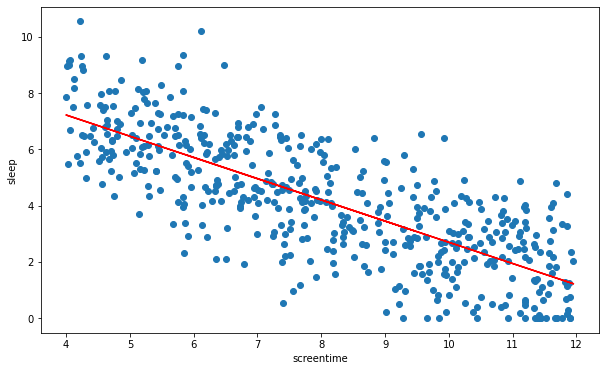

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(screentime, sleep)
ax.set_xlabel('screentime')
ax.set_ylabel('sleep')

ax.plot(screentime, screentime * nm + nb,c='r')
plt.show()

## [See our solution!](https://www.practiceprobs.com/problemsets/pytorch/tensors/screen-time/solution/)